In [ ]:
!pip install Quandl

In [3]:
import quandl as Quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing,  model_selection as cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import pickle



In [4]:
style.use('ggplot')

df = Quandl.get("WIKI/GOOGL", api_key='tJbUksb_TeZXtwAgDeia')
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

print(df.head(5)) 


            Adj. Open  Adj. High   Adj. Low  ...  Adj. Volume    HL_PCT  PCT_change
Date                                         ...                                   
2004-08-19  50.159839  52.191109  48.128568  ...   44659000.0  8.072956    0.324968
2004-08-20  50.661387  54.708881  50.405597  ...   22834300.0  7.921706    7.227007
2004-08-23  55.551482  56.915693  54.693835  ...   18256100.0  4.049360   -1.227880
2004-08-24  55.792225  55.972783  51.945350  ...   15247300.0  7.657099   -5.726357
2004-08-25  52.542193  54.167209  52.100830  ...    9188600.0  3.886792    1.183658

[5 rows x 7 columns]


In [5]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'

print(df.head(5))


            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.072956    0.324968   44659000.0
2004-08-20   54.322689  7.921706    7.227007   22834300.0
2004-08-23   54.869377  4.049360   -1.227880   18256100.0
2004-08-24   52.597363  7.657099   -5.726357   15247300.0
2004-08-25   53.164113  3.886792    1.183658    9188600.0


In [6]:
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.1 * len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])



In [9]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
#COMMENTED OUT:
##clf = svm.SVR(kernel='linear')
##clf.fit(X_train, y_train)
##confidence = clf.score(X_test, y_test)
##print(confidence)
pickle_in = open('/content/linearregression.pickle','rb')
clf = pickle.load(pickle_in)




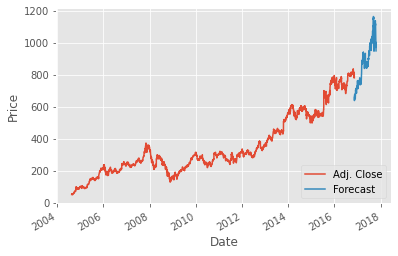

In [10]:
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()